In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

pd.set_option("display.max_columns", 85)

# Voting Classifier

A voting classifier aggregates the predictions from an ensemble of models and predict the class with the most votes (hard voting) or highest average probability (soft voting). 

> Somewhat surprisingly, this voting classifier often achieves a higher accuracy than the best classifier in the ensemble. _Gèron, Ch 7_

A voting classifier performs best when the member classifiers make independent predictions. 

> Ensemble methods work best when the predictors are as independent from one another as possible. One way to get diverse classifiers is to train them using very different algorithms. This increases the chance that they will make very different types of errors, improving the ensemble’s accuracy. _Gèron, Ch 7_

<img src="../images/voting_classifier.png" alt="Voting Classifier (Gèron)" width="800"/>

In [3]:
df = pd.read_csv("../data/abnormal_writeout_noscale.data.csv")

# trascurare da ACC a UVM
start_drop = df.columns.get_loc("ACC")
end_drop = df.columns.get_loc("UVM")
cols = np.arange(start_drop, end_drop + 1)
df.drop(df.columns[cols], axis=1, inplace=True)

# trascurare alcune colonne
df.drop("TTT_freq", axis=1, inplace=True)
df.drop("oldest_phylostratum_factor", axis=1, inplace=True)
df.drop("Unnamed: 0", axis=1, inplace=True)

# Drop NaNs
df.dropna(inplace=True)

# Sort features
resp = df["response"].to_numpy()
occ = df["occ_total_sum"]
age = df["oldest_phylostratum"].to_numpy()
conf = df.drop(labels=["response", "occ_total_sum", "oldest_phylostratum"], axis=1).to_numpy()

features_df = 
X = np.c_[occ, age, conf]
Y = resp

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print("Feature matrix shape:", X_train.shape, X_test.shape)

Feature matrix shape: (14536, 83) (3634, 83)


In [5]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82
0,33.0,12.0,1488.0,0.657258,0.612230,0.758065,0.561429,1.000000,0.216855,0.661290,1.00000,0.198925,0.0,0.041809,0.809254,0.706453,6.798234,0.040516,0.0,0.000000,0.004755,0.008152,0.007473,0.002717,0.011549,0.026495,0.010870,0.008152,0.010190,0.028533,0.019701,0.009511,0.000679,0.006114,0.010870,0.002038,0.009511,0.019022,0.028533,0.007473,0.027174,0.031250,0.025136,0.029891,0.015625,0.027174,0.019701,0.009511,0.007473,0.017663,0.044837,0.013587,0.008832,0.021739,0.031250,0.008152,0.016984,0.033967,0.027853,0.034647,0.023777,0.030571,0.029212,0.013587,0.000679,0.012908,0.027174,0.003397,0.000000,0.008152,0.000000,0.001359,0.008832,0.021739,0.009511,0.010190,0.020380,0.027174,0.029212,0.010870,0.000679,0.013587,0.005435
1,28.0,1.0,873.0,0.422680,0.086769,0.195876,0.657839,0.000000,0.000000,0.000000,0.00000,0.000000,1.0,-0.007148,0.828752,1.097018,0.061963,0.002809,0.0,2.043350,0.025258,0.019518,0.021814,0.024110,0.025258,0.018370,0.003444,0.012629,0.035591,0.009185,0.016073,0.006889,0.016073,0.017222,0.010333,0.033295,0.019518,0.011481,0.020666,0.022962,0.017222,0.008037,0.002296,0.021814,0.003444,0.001148,0.004592,0.002296,0.008037,0.019518,0.022962,0.019518,0.033295,0.013777,0.019518,0.011481,0.014925,0.006889,0.000000,0.012629,0.018370,0.011481,0.017222,0.018370,0.005741,0.008037,0.012629,0.012629,0.012629,0.014925,0.006889,0.017222,0.017222,0.016073,0.005741,0.022962,0.020666,0.012629,0.027555,0.011481,0.021814,0.017222,0.026406
2,36.0,1.0,1092.0,0.572344,0.479295,0.611722,0.851369,0.354628,0.618954,0.754579,0.03022,0.086996,0.0,0.040463,1.249600,1.354306,6.081620,0.028404,0.0,0.868383,0.018727,0.012172,0.023408,0.003745,0.017790,0.024345,0.007491,0.014981,0.024345,0.020599,0.025281,0.011236,0.003745,0.013109,0.019663,0.004682,0.017790,0.016854,0.029963,0.017790,0.034644,0.022472,0.010300,0.028090,0.005618,0.010300,0.014045,0.003745,0.015918,0.015918,0.033708,0.011236,0.014981,0.022472,0.026217,0.009363,0.015918,0.031835,0.007491,0.025281,0.028090,0.029026,0.021536,0.013109,0.008427,0.010300,0.016854,0.003745,0.006554,0.012172,0.005618,0.008427,0.014981,0.016854,0.009363,0.008427,0.014981,0.019663,0.029026,0.010300,0.004682,0.010300,0.004682


In [4]:
df.head()

,response,cds_length,occ_total_sum,oldest_phylostratum,gc_cds,dnase_gene,dnase_cds,H3k4me1_gene,H3k4me3_gene,H3k27ac_gene,H3k4me1_cds,H3k4me3_cds,H3k27ac_cds,lamin_gene,repli_gene,nsome_gene,nsome_cds,transcription_gene,repeat_gene,repeat_cds,recomb_gene,AAA_freq,AAC_freq,AAG_freq,AAT_freq,ACA_freq,ACC_freq,ACG_freq,ACT_freq,AGA_freq,AGC_freq,AGG_freq,AGT_freq,ATA_freq,ATC_freq,ATG_freq,ATT_freq,CAA_freq,CAC_freq,CAG_freq,CAT_freq,CCA_freq,CCC_freq,CCG_freq,CCT_freq,CGA_freq,CGC_freq,CGG_freq,CGT_freq,CTA_freq,CTC_freq,CTG_freq,CTT_freq,GAA_freq,GAC_freq,GAG_freq,GAT_freq,GCA_freq,GCC_freq,GCG_freq,GCT_freq,GGA_freq,GGC_freq,GGG_freq,GGT_freq,GTA_freq,GTC_freq,GTG_freq,GTT_freq,TAA_freq,TAC_freq,TAG_freq,TAT_freq,TCA_freq,TCC_freq,TCG_freq,TCT_freq,TGA_freq,TGC_freq,TGG_freq,TGT_freq,TTA_freq,TTC_freq,TTG_freq
0,0,1488,33,12.0,0.657258,0.612230,0.758065,0.561429,1.000000,0.216855,0.661290,1.000000,0.198925,0.0,0.041809,0.809254,0.706453,6.798234,0.040516,0.0,0.000000,0.004755,0.008152,0.007473,0.002717,0.011549,0.026495,0.010870,0.008152,0.010190,0.028533,0.019701,0.009511,0.000679,0.006114,0.010870,0.002038,0.009511,0.019022,0.028533,0.007473,0.027174,0.031250,0.025136,0.029891,0.015625,0.027174,0.019701,0.009511,0.007473,0.017663,0.044837,0.013587,0.008832,0.021739,0.031250,0.008152,0.016984,0.033967,0.027853,0.034647,0.023777,0.030571,0.029212,0.013587,0.000679,0.012908,0.027174,0.003397,0.000000,0.008152,0.000000,0.001359,0.008832,0.021739,0.009511,0.010190,0.020380,0.027174,0.029212,0.010870,0.000679,0.013587,0.005435
1,0,873,28,1.0,0.422680,0.086769,0.195876,0.657839,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,-0.007148,0.828752,1.097018,0.061963,0.002809,0.0,2.043350,0.025258,0.019518,0.021814,0.024110,0.025258,0.018370,0.003444,0.012629,0.035591,0.009185,0.016073,0.006889,0.016073,0.017222,0.010333,0.033295,0.019518,0.011481,0.020666,0.022962,0.017222,0.008037,0.002296,0.021814,0.003444,0.001148,0.004592,0.002296,0.008037,0.019518,0.022962,0.019518,0.033295,0.013777,0.019518,0.011481,0.014925,0.006889,0.000000,0.012629,0.018370,0.011481,0.017222,0.018370,0.005741,0.008037,0.012629,0.012629,0.012629,0.014925,0.006889,0.017222,0.017222,0.016073,0.005741,0.022962,0.020666,0.012629,0.027555,0.011481,0.021814,0.017222,0.026406
2,1,1092,36,1.0,0.572344,0.479295,0.611722,0.851369,0.354628,0.618954,0.754579,0.030220,0.086996,0.0,0.040463,1.249600,1.354306,6.081620,0.028404,0.0,0.868383,0.018727,0.012172,0.023408,0.003745,0.017790,0.024345,0.007491,0.014981,0.024345,0.020599,0.025281,0.011236,0.003745,0.013109,0.019663,0.004682,0.017790,0.016854,0.029963,0.017790,0.034644,0.022472,0.010300,0.028090,0.005618,0.010300,0.014045,0.003745,0.015918,0.015918,0.033708,0.011236,0.014981,0.022472,0.026217,0.009363,0.015918,0.031835,0.007491,0.025281,0.028090,0.029026,0.021536,0.013109,0.008427,0.010300,0.016854,0.003745,0.006554,0.012172,0.005618,0.008427,0.014981,0.016854,0.009363,0.008427,0.014981,0.019663,0.029026,0.010300,0.004682,0.010300,0.004682
3,0,2800,126,1.0,0.460000,0.171524,0.280357,0.554023,0.052420,0.278492,0.270357,0.021429,0.151429,0.0,-0.022495,0.921420,1.382249,2.254471,0.014520,0.0,1.143060,0.022054,0.014823,0.022415,0.024946,0.022054,0.014100,0.006146,0.015546,0.024946,0.016992,0.012292,0.015907,0.013377,0.021330,0.026392,0.017715,0.026392,0.011931,0.027477,0.017354,0.023861,0.016992,0.006508,0.019161,0.005785,0.003977,0.007954,0.003977,0.006146,0.010846,0.025307,0.015907,0.022415,0.022777,0.016269,0.018800,0.015184,0.016992,0.004700,0.014461,0.017354,0.010484,0.010123,0.011931,0.009400,0.007231,0.020607,0.011931,0.013738,0.008315,0.006146,0.016631,0.022054,0.018077,0.004700,0.009038,0.031092,0.019523,0.019523,0.016992,0.016269,0.014100,0.015907
4,1,1484,55,1.0,0.401617,0.143843,0.030997,0.400789,0.106455,0.457949,0.708221,0.030997,0.659704,0.0,-0.000387,0.960747,1.196871,1.080241,0.009545,0.0,4.217000,0.039835,0.015797,0.030220,0.025412,0.024038,0.012363,0.002747,0.019918,0.048077,0.006868,0.015797,0.009615,0.0

In [3]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import PCA

conf_cols = np.arange(:2, X.shape[1])  # Columns of confounder variables (highly colinear)


class ConfounderPCA(BaseEstimator, TransformerMixin):
    """ Custom PCA transformer for this dataset"""

    def __init__(self, explained_variance=0.95, apply_PCA=True):
        self.apply_PCA = apply_PCA
        self.explained_variance = explained_variance
        if self.apply_PCA:
            self.pca = PCA(n_components=self.explained_variance)

    def fit(self, X, y=None):
        if self.apply_PCA:
            self.pca.fit(X[:, conf_cols])
        return self

    def transform(self, X, y=None):
        if self.apply_PCA:
            X_conf_pca = self.pca.transform(X[:, conf_cols])
            return np.c_[X[:, :2], X_conf_pca]
        else:
            return X

In [4]:
from sklearn.metrics import auc, make_scorer, precision_recall_curve


def auprc(y_true, y_scores, **kwargs):
    """ Remember to use make_scorer(auprc, needs_proba=True,) """
    precisions, recalls, thresholds = precision_recall_curve(y_true, y_scores)
    # result is sum of the areas under each curve
    return auc(thresholds, precisions[:-1]) + auc(thresholds, recalls[:-1])

# 1 - [Spearman Correlation Coefficient](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html)

The _spearman correlation coefficient_ is defined as the pearson correlation coefficient between the rank variables:

$$
r_s = \rho_{R(X), R(Y)} = \frac{Cov(R(X), R(Y))}{\sigma_R(X), \sigma_R(Y)}.
$$


If all $n$ ranks are distinct, it can be computed using

$$
r_s = 1 - \frac{6 \sum d_i^2 }{n(n^2-1)} \\ \\
d_i = R(X_i) - R(Y_i).
$$

In [5]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

rf_clf = Pipeline([
    ('scaler', StandardScaler()), # !! Absolutely necessary before PCA
    ("pca", ConfounderPCA()), 
    ("rf", BalancedRandomForestClassifier(
        max_depth=10,
        max_features=2,
        min_samples_leaf=2, 
        min_samples_split=20, 
        n_estimators=500,
        random_state=42, n_jobs=-1
    ))
])

lr_clf = Pipeline([
    ('scaler', StandardScaler()), # Improves convergence
    # ("pca", ConfounderPCA()), 
    ("lr", LogisticRegression(max_iter=500, class_weight='balanced')),
])

gnb_clf = Pipeline([
    # ('scaler', StandardScaler()),
    # ("pca", ConfounderPCA()), 
    ("gnb", GaussianNB()),
])

svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    # ("pca", ConfounderPCA()),
    ("svc", SVC(
        C=1.0, shrinking=False,
        class_weight='balanced',
        kernel="rbf", 
        probability=True,
        random_state=0,
    ))
])

In [6]:
rf_clf.fit(X_train, y_train)
lr_clf.fit(X_train, y_train)
gnb_clf.fit(X_train, y_train)
svm_clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svc',
                 SVC(class_weight='balanced', probability=True, random_state=0,
                     shrinking=False))])

In [7]:
pred_df = pd.DataFrame()

pred_df["LR_pred"] = lr_clf.predict(X_test)
pred_df["RF_pred"] = rf_clf.predict(X_test)
pred_df["GNB_pred"] = gnb_clf.predict(X_test)
pred_df["SVM_pred"] = svm_clf.predict(X_test)

proba_df = pd.DataFrame()

proba_df["LR_proba"] = lr_clf.predict_proba(X_test)[:, 0]
proba_df["RF_proba"] = rf_clf.predict_proba(X_test)[:, 0]
proba_df["GNB_proba"] = gnb_clf.predict_proba(X_test)[:, 0]
proba_df["SVM_proba"] = svm_clf.predict_proba(X_test)[:, 0]

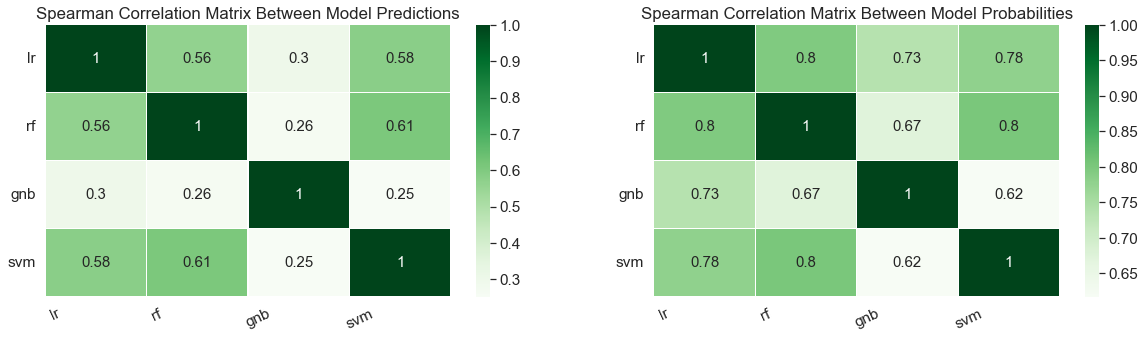

In [9]:
from scipy.stats import spearmanr

# Build the plot
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
sns.set(font_scale=1.4)

# Add labels to the plot
model_names = ["lr", "rf", "gnb", "svm"]
tick_marks = np.arange(len(model_names)) + 0.1
tick_marks2 = tick_marks + 0.4

# Plot 1
sns.heatmap(spearmanr(pred_df).correlation, annot=True, annot_kws={"size": 15}, cmap=plt.cm.Greens, linewidths=0.2, ax=ax[0])
ax[0].set_xticks(tick_marks)
ax[0].set_xticklabels(model_names)
ax[0].tick_params(axis="x", labelrotation=25)
ax[0].set_yticks(tick_marks2)
ax[0].set_yticklabels(model_names)
ax[0].tick_params(axis="y", labelrotation=0)
ax[0].title.set_text("Spearman Correlation Matrix Between Model Predictions")

# Plot 2
sns.heatmap(spearmanr(proba_df).correlation, annot=True, annot_kws={"size": 15}, cmap=plt.cm.Greens, linewidths=0.2, ax=ax[1])
ax[1].set_xticks(tick_marks)
ax[1].set_xticklabels(model_names)
ax[1].tick_params(axis="x", labelrotation=25)
ax[1].set_yticks(tick_marks2)
ax[1].set_yticklabels(model_names)
ax[1].tick_params(axis="y", labelrotation=0)
ax[1].title.set_text("Spearman Correlation Matrix Between Model Probabilities")

plt.show()

**Figure: Spearman Correlation Matrices for member model predictions and probabilities.** Because model predictions can diverge to 0 and 1 despite similar probabilities, the correlations between predictions are always lower than the correlations between probabilities. By the figure on the left, it would seem that the gaussian naive bayes classifier is the most independent from the other classifiers. 

# 2 - Feature Importance

If each of the member models makes predictions using different features, that would be a good indicator that the voting method should perform better 

[Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)  
[Random Forest Feature Importance](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.feature_importances_) 

In [31]:
lr_clf = Pipeline([
    ('scaler', StandardScaler()), 
    ("lr", LogisticRegression(max_iter=500, class_weight='balanced')),
])

lr_clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('lr',
                 LogisticRegression(class_weight='balanced', max_iter=500))])

In [71]:
df.drop(columns='response', inplace=True)
df.iloc[:, importance_df.sort_values(by="Score", key=abs, ascending=False).index]

,cds_length,AGT_freq,GTA_freq,repli_gene,GCG_freq,TCT_freq,CGA_freq,TGT_freq,GGT_freq,TTA_freq,GTC_freq,nsome_gene,lamin_gene,dnase_gene,TTG_freq,TGG_freq,GGG_freq,AAG_freq,occ_total_sum,H3k4me1_cds,nsome_cds,H3k4me3_gene,ATC_freq,H3k4me3_cds,recomb_gene,repeat_gene,TAC_freq,GTG_freq,AGC_freq,TAG_freq,CCA_freq,GAC_freq,CTT_freq,GCA_freq,TTC_freq,TCA_freq,AGG_freq,TCC_freq,ACG_freq,AGA_freq,CGT_freq,H3k27ac_cds,GAT_freq,AAA_freq,ACC_freq,TCG_freq,GGA_freq,H3k4me1_gene,ACT_freq,ACA_freq,H3k27ac_gene,CTC_freq,CCT_freq,AAC_freq,CTA_freq,GTT_freq,CGC_freq,CAC_freq,TGA_freq,dnase_cds,GCT_freq,CAT_freq,CGG_freq,TAT_freq,CAG_freq,GAG_freq,GGC_freq,CAA_freq,TGC_freq,transcription_gene,CCC_freq,GCC_freq,GAA_freq,repeat_cds,ATA_freq,AAT_freq,CCG_freq,gc_cds,oldest_phylostratum,CTG_freq,ATT_freq,TAA_freq,ATG_freq
0,1488,0.009511,0.000679,0.041809,0.027853,0.010190,0.015625,0.010870,0.013587,0.000679,0.012908,0.809254,0.0,0.612230,0.005435,0.029212,0.029212,0.007473,33,0.661290,0.706453,1.000000,0.006114,1.000000,0.000000,0.040516,0.008152,0.027174,0.028533,0.000000,0.027174,0.021739,0.013587,0.016984,0.013587,0.008832,0.019701,0.021739,0.010870,0.010190,0.009511,0.198925,0.008152,0.004755,0.026495,0.009511,0.023777,0.561429,0.008152,0.011549,0.216855,0.017663,0.029891,0.008152,0.007473,0.003397,0.027174,0.019022,0.020380,0.758065,0.034647,0.007473,0.019701,0.001359,0.028533,0.031250,0.030571,0.009511,0.027174,6.798234,0.031250,0.033967,0.008832,0.0,0.000679,0.002717,0.025136,0.657258,12.0,0.044837,0.002038,0.000000,0.010870
1,873,0.006889,0.005741,-0.007148,0.000000,0.022962,0.003444,0.011481,0.018370,0.021814,0.008037,0.828752,1.0,0.086769,0.026406,0.027555,0.017222,0.021814,28,0.000000,1.097018,0.000000,0.017222,0.000000,2.043350,0.002809,0.014925,0.012629,0.009185,0.006889,0.017222,0.013777,0.019518,0.014925,0.017222,0.017222,0.016073,0.016073,0.003444,0.035591,0.002296,0.000000,0.011481,0.025258,0.018370,0.005741,0.018370,0.657839,0.012629,0.025258,0.000000,0.019518,0.021814,0.019518,0.008037,0.012629,0.001148,0.011481,0.020666,0.195876,0.012629,0.022962,0.004592,0.017222,0.020666,0.019518,0.011481,0.019518,0.012629,0.061963,0.008037,0.006889,0.033295,0.0,0.016073,0.024110,0.002296,0.422680,1.0,0.022962,0.033295,0.012629,0.010333
2,1092,0.011236,0.008427,0.040463,0.007491,0.008427,0.005618,0.010300,0.013109,0.004682,0.010300,1.249600,0.0,0.479295,0.004682,0.029026,0.021536,0.023408,36,0.754579,1.354306,0.354628,0.013109,0.030220,0.868383,0.028404,0.012172,0.016854,0.020599,0.005618,0.034644,0.022472,0.011236,0.015918,0.010300,0.014981,0.025281,0.016854,0.007491,0.024345,0.003745,0.086996,0.009363,0.018727,0.024345,0.009363,0.028090,0.851369,0.014981,0.017790,0.618954,0.015918,0.028090,0.012172,0.015918,0.003745,0.010300,0.016854,0.014981,0.611722,0.025281,0.017790,0.014045,0.008427,0.029963,0.026217,0.029026,0.017790,0.019663,6.081620,0.022472,0.031835,0.014981,0.0,0.003745,0.003745,0.010300,0.572344,1.0,0.033708,0.004682,0.006554,0.019663
3,2800,0.015907,0.009400,-0.022495,0.004700,0.009038,0.005785,0.016992,0.011931,0.016269,0.007231,0.921420,0.0,0.171524,0.015907,0.019523,0.010123,0.022415,126,0.270357,1.382249,0.052420,0.021330,0.021429,1.143060,0.014520,0.008315,0.020607,0.016992,0.006146,0.023861,0.022777,0.015907,0.015184,0.014100,0.022054,0.012292,0.018077,0.006146,0.024946,0.003977,0.151429,0.018800,0.022054,0.014100,0.004700,0.017354,0.554023,0.015546,0.022054,0.278492,0.010846,0.019161,0.014823,0.006146,0.011931,0.003977,0.011931,0.031092,0.280357,0.014461,0.017354,0.007954,0.016631,0.027477,0.016269,0.010484,0.026392,0.019523,2.254471,0.016992,0.016992,0.022415,0.0,0.013377,0.024946,0.006508,0.460000,1.0,0.025307,0.017715,0.013738,0.026392
4,1484,0.009615,0.009615,-0.000387,0.002747,0.015797,0.005495,0.018544,0.008242,0.014423,0.004808,0.960747,0.0,0.143843,0.019231,0.026099,0.010302,0.030220,55,0.708221,1.196871,0.106455,0.009615,0.030997,4.217000,0.009545,0.012363,0.013736,0.006868,0.008242,0.015110,0.017857,0.013736,0.0

In [32]:
importance_df = pd.DataFrame(np.reshape(lr_clf["lr"].coef_, (lr_clf["lr"].coef_.shape[1], 1)), columns=["Score"])
top_features_lr = importance_df.sort_values(by="Score", key=abs, ascending=False).index.to_numpy()
importance_df.sort_values(by="Score", key=abs, ascending=False).head(10)

,Score
79,-1.029191
66,0.896040
3,0.855108
45,-0.771229
77,-0.750641
71,0.731362
46,-0.698490
50,0.696801
31,-0.684703
58,0.684126


In [79]:
df.head()

,response,cds_length,occ_total_sum,oldest_phylostratum,gc_cds,dnase_gene,dnase_cds,H3k4me1_gene,H3k4me3_gene,H3k27ac_gene,H3k4me1_cds,H3k4me3_cds,H3k27ac_cds,lamin_gene,repli_gene,nsome_gene,nsome_cds,transcription_gene,repeat_gene,repeat_cds,recomb_gene,AAA_freq,AAC_freq,AAG_freq,AAT_freq,ACA_freq,ACC_freq,ACG_freq,ACT_freq,AGA_freq,AGC_freq,AGG_freq,AGT_freq,ATA_freq,ATC_freq,ATG_freq,ATT_freq,CAA_freq,CAC_freq,CAG_freq,CAT_freq,CCA_freq,CCC_freq,CCG_freq,CCT_freq,CGA_freq,CGC_freq,CGG_freq,CGT_freq,CTA_freq,CTC_freq,CTG_freq,CTT_freq,GAA_freq,GAC_freq,GAG_freq,GAT_freq,GCA_freq,GCC_freq,GCG_freq,GCT_freq,GGA_freq,GGC_freq,GGG_freq,GGT_freq,GTA_freq,GTC_freq,GTG_freq,GTT_freq,TAA_freq,TAC_freq,TAG_freq,TAT_freq,TCA_freq,TCC_freq,TCG_freq,TCT_freq,TGA_freq,TGC_freq,TGG_freq,TGT_freq,TTA_freq,TTC_freq,TTG_freq
0,0,1488,33,12.0,0.657258,0.612230,0.758065,0.561429,1.000000,0.216855,0.661290,1.000000,0.198925,0.0,0.041809,0.809254,0.706453,6.798234,0.040516,0.0,0.000000,0.004755,0.008152,0.007473,0.002717,0.011549,0.026495,0.010870,0.008152,0.010190,0.028533,0.019701,0.009511,0.000679,0.006114,0.010870,0.002038,0.009511,0.019022,0.028533,0.007473,0.027174,0.031250,0.025136,0.029891,0.015625,0.027174,0.019701,0.009511,0.007473,0.017663,0.044837,0.013587,0.008832,0.021739,0.031250,0.008152,0.016984,0.033967,0.027853,0.034647,0.023777,0.030571,0.029212,0.013587,0.000679,0.012908,0.027174,0.003397,0.000000,0.008152,0.000000,0.001359,0.008832,0.021739,0.009511,0.010190,0.020380,0.027174,0.029212,0.010870,0.000679,0.013587,0.005435
1,0,873,28,1.0,0.422680,0.086769,0.195876,0.657839,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,-0.007148,0.828752,1.097018,0.061963,0.002809,0.0,2.043350,0.025258,0.019518,0.021814,0.024110,0.025258,0.018370,0.003444,0.012629,0.035591,0.009185,0.016073,0.006889,0.016073,0.017222,0.010333,0.033295,0.019518,0.011481,0.020666,0.022962,0.017222,0.008037,0.002296,0.021814,0.003444,0.001148,0.004592,0.002296,0.008037,0.019518,0.022962,0.019518,0.033295,0.013777,0.019518,0.011481,0.014925,0.006889,0.000000,0.012629,0.018370,0.011481,0.017222,0.018370,0.005741,0.008037,0.012629,0.012629,0.012629,0.014925,0.006889,0.017222,0.017222,0.016073,0.005741,0.022962,0.020666,0.012629,0.027555,0.011481,0.021814,0.017222,0.026406
2,1,1092,36,1.0,0.572344,0.479295,0.611722,0.851369,0.354628,0.618954,0.754579,0.030220,0.086996,0.0,0.040463,1.249600,1.354306,6.081620,0.028404,0.0,0.868383,0.018727,0.012172,0.023408,0.003745,0.017790,0.024345,0.007491,0.014981,0.024345,0.020599,0.025281,0.011236,0.003745,0.013109,0.019663,0.004682,0.017790,0.016854,0.029963,0.017790,0.034644,0.022472,0.010300,0.028090,0.005618,0.010300,0.014045,0.003745,0.015918,0.015918,0.033708,0.011236,0.014981,0.022472,0.026217,0.009363,0.015918,0.031835,0.007491,0.025281,0.028090,0.029026,0.021536,0.013109,0.008427,0.010300,0.016854,0.003745,0.006554,0.012172,0.005618,0.008427,0.014981,0.016854,0.009363,0.008427,0.014981,0.019663,0.029026,0.010300,0.004682,0.010300,0.004682
3,0,2800,126,1.0,0.460000,0.171524,0.280357,0.554023,0.052420,0.278492,0.270357,0.021429,0.151429,0.0,-0.022495,0.921420,1.382249,2.254471,0.014520,0.0,1.143060,0.022054,0.014823,0.022415,0.024946,0.022054,0.014100,0.006146,0.015546,0.024946,0.016992,0.012292,0.015907,0.013377,0.021330,0.026392,0.017715,0.026392,0.011931,0.027477,0.017354,0.023861,0.016992,0.006508,0.019161,0.005785,0.003977,0.007954,0.003977,0.006146,0.010846,0.025307,0.015907,0.022415,0.022777,0.016269,0.018800,0.015184,0.016992,0.004700,0.014461,0.017354,0.010484,0.010123,0.011931,0.009400,0.007231,0.020607,0.011931,0.013738,0.008315,0.006146,0.016631,0.022054,0.018077,0.004700,0.009038,0.031092,0.019523,0.019523,0.016992,0.016269,0.014100,0.015907
4,1,1484,55,1.0,0.401617,0.143843,0.030997,0.400789,0.106455,0.457949,0.708221,0.030997,0.659704,0.0,-0.000387,0.960747,1.196871,1.080241,0.009545,0.0,4.217000,0.039835,0.015797,0.030220,0.025412,0.024038,0.012363,0.002747,0.019918,0.048077,0.006868,0.015797,0.009615,0.0

In [33]:
rf_clf = Pipeline([
    ('scaler', StandardScaler()), # !! Absolutely necessary before PCA
    ("pca", ConfounderPCA()), 
    ("rf", BalancedRandomForestClassifier(
        max_depth=10,
        max_features=2,
        min_samples_leaf=2, 
        min_samples_split=20, 
        n_estimators=500,
        random_state=42, n_jobs=-1
    ))
])

rf_clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', ConfounderPCA()),
                ('rf',
                 BalancedRandomForestClassifier(max_depth=10, max_features=2,
                                                min_samples_leaf=2,
                                                min_samples_split=20,
                                                n_estimators=500, n_jobs=-1,
                                                random_state=42))])

In [34]:
importance_df = pd.DataFrame(rf_clf["rf"].feature_importances_, columns=["Score"])
top_features_rf = importance_df.sort_values(by="Score", key=abs, ascending=False).index.to_numpy()
importance_df.sort_values(by="Score", key=abs, ascending=False).head(10)

,Score
0,0.058677
1,0.044785
8,0.029464
3,0.028224
10,0.026352
25,0.025785
13,0.025348
20,0.024915
23,0.023124
17,0.022813


### [Permutation Feature Importance](https://scikit-learn.org/stable/modules/permutation_importance.html#permutation-importance)  

> The permutation feature importance is defined to be the decrease in a model score when a single feature value is randomly shuffled. This procedure breaks the relationship between the feature and the target, thus the drop in the model score is indicative of how much the model depends on the feature. _Scikit-Learn 4.2_

> **Warning:** Features that are deemed of low importance for a bad model (low cross-validation score) could be very important for a good model. Therefore it is always important to evaluate the predictive power of a model using a held-out set (or better with cross-validation) prior to computing importances. Permutation importance **does not** reflect to the **intrinsic predictive value** of a feature by itself but how **important** this feature is **for a particular model**.

In [35]:
from sklearn.inspection import permutation_importance

In [36]:
lr_clf = Pipeline([
    ('scaler', StandardScaler()), 
    ("lr", LogisticRegression(max_iter=500, class_weight='balanced')),
])

lr_clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('lr',
                 LogisticRegression(class_weight='balanced', max_iter=500))])

In [37]:
importance_lr = permutation_importance(lr_clf, X_train, y_train, n_repeats=10, random_state=0, scoring='roc_auc', n_jobs=-1)

In [38]:
importance_df = pd.DataFrame(importance_lr.importances_mean, columns=["Score"])
top_features_lr_permutation = importance_df.sort_values(by="Score", key=abs, ascending=False).index.to_numpy()
importance_df.sort_values(by="Score", key=abs, ascending=False).head(10)

,Score
79,0.102606
66,0.093771
3,0.092988
71,0.077041
28,0.074020
31,0.072187
77,0.071690
32,0.071466
50,0.069920
46,0.069783


In [39]:
rf_clf = Pipeline([
    ('scaler', StandardScaler()), # !! Absolutely necessary before PCA
    ("pca", ConfounderPCA()), 
    ("rf", BalancedRandomForestClassifier(
        max_depth=10,
        max_features=2,
        min_samples_leaf=2, 
        min_samples_split=20, 
        n_estimators=500,
        random_state=42, n_jobs=-1
    ))
])

rf_clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', ConfounderPCA()),
                ('rf',
                 BalancedRandomForestClassifier(max_depth=10, max_features=2,
                                                min_samples_leaf=2,
                                                min_samples_split=20,
                                                n_estimators=500, n_jobs=-1,
                                                random_state=42))])

In [40]:
importance_rf = permutation_importance(rf_clf, X_train, y_train, n_repeats=10, random_state=0, scoring='roc_auc', n_jobs=-1)

In [74]:
importance_df = pd.DataFrame(importance_rf.importances_mean, columns=["Score"])
top_features_rf_permutation = importance_df.sort_values(by="Score", key=abs, ascending=False).index.to_numpy()
importance_df.sort_values(by="Score", key=abs, ascending=False).head(5)

,Score
24,0.066150
81,0.066024
72,0.064253
70,0.064115
31,0.063890


In [75]:
importance_df

,Score
0,0.007116
1,0.015861
2,0.029555
3,0.016132
4,0.043898
...,...
78,0.062570
79,0.060785
80,0.036143
81,0.066024


In [42]:
gnb_clf = Pipeline([
    # ('scaler', StandardScaler()),
    # ("pca", ConfounderPCA()), 
    ("gnb", GaussianNB()),
])

gnb_clf.fit(X_train, y_train)

Pipeline(steps=[('gnb', GaussianNB())])

In [43]:
importance_gnb = permutation_importance(gnb_clf, X_train, y_train, n_repeats=10, random_state=0, scoring='roc_auc', n_jobs=-1)

In [44]:
importance_df = pd.DataFrame(importance_gnb.importances_mean, columns=["Score"])
top_features_gnb = importance_df.sort_values(by="Score", key=abs, ascending=False).index.to_numpy()
importance_df.sort_values(by="Score", key=abs, ascending=False).head(10)

,Score
1,0.036090
0,0.019175
2,0.012107
18,0.007616
16,0.007154
9,0.001076
8,-0.001074
6,0.001055
15,0.001017
10,0.000886


In [59]:
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    # ("pca", ConfounderPCA()),
    ("svc", SVC(
        C=1.0, shrinking=False,
        class_weight='balanced',
        kernel="rbf", 
        probability=True,
        random_state=0,
    ))
])

svm_clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svc',
                 SVC(class_weight='balanced', probability=True, random_state=0,
                     shrinking=False))])

In [62]:
svm_clf

Pipeline(steps=[('scaler', StandardScaler()),
                ('svc',
                 SVC(class_weight='balanced', probability=True, random_state=0,
                     shrinking=False))])

In [60]:
# TODO
importance_svm = permutation_importance(svm_clf, X_train, y_train, n_repeats=10, random_state=0, scoring='roc_auc', n_jobs=-1, )

/Applications/anaconda3/envs/ml_venv/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:775: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/envs/ml_venv/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return cache[method]
KeyError: 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Applications/anaconda3/envs/ml_venv/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/Applications/anaconda3/envs/ml_venv/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    result = getattr(estimator, method)(*args, **kwargs)
AttributeError: 'VotingClassifier' object has no attribute 'decision_function'

During h

In [63]:
importance_df = pd.DataFrame(importance_svm.importances_mean, columns=["Score"])
top_features_svm = importance_df.sort_values(by="Score", key=abs, ascending=False).index.to_numpy()
importance_df.sort_values(by="Score", key=abs, ascending=False).head(10)

,Score
0,0.026207
31,0.012117
64,0.011668
13,0.010164
58,0.009802
75,0.009672
44,0.009495
79,0.009184
63,0.008640
80,0.008560


In [64]:
n = 20
print("LR highest scoring features: ", top_features_lr[:n])
print("RF highest scoring features: ", top_features_rf[:n]) # Uses PCA
print("GNB highest scoring features:", top_features_gnb[:n])
print("SVM highest scoring features:", top_features_svm[:n])

LR highest scoring features:  [79 66  3 45 77 71 46 50 31 58 32 28 40 30 29 56 80 78 82 22]
RF highest scoring features:  [ 0  1  8  3 10 25 13 20 23 17  4 30 19  5  7 46 36 41 18 24]
GNB highest scoring features: [ 1  0  2 18 16  9  8  6 15 10 14  5 11 19  3  4 12  7 17 34]
SVM highest scoring features: [ 0 31 64 13 58 75 44 79 63 80 65 14 12  4 82 78 62 22  1  9]


# 3 - Cross-Validating the [Voting Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html#sklearn.ensemble.VotingClassifier)

How did I determine the steps in each model's pipeline?
- Random Forest: scaling is necessary for PCA, PCA improves random forest generalizatin (cit. Gèron) **should i opt not to reduce dimensionality?**
- Logistic Regression: scaling improves model convergence
- Gaussian Naive Bayes: does not seem to need either scaling or PCA
- Support Vector Machine: SVM's are sensitive to feature scales

And the parameters? Grid-search cross-validation.

In [52]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_validate

rf_clf = Pipeline([
    ('scaler', StandardScaler()), # !! Absolutely necessary before PCA
    ("pca", ConfounderPCA()), 
    ("rf", BalancedRandomForestClassifier(
        max_depth=10,
        max_features=2,
        min_samples_leaf=2, 
        min_samples_split=20, 
        n_estimators=500,
        random_state=42, n_jobs=-1
    ))
])

lr_clf = Pipeline([
    ('scaler', StandardScaler()), # Improves convergence
    # ("pca", ConfounderPCA()), 
    ("lr", LogisticRegression(max_iter=500, class_weight='balanced')),
])

gnb_clf = Pipeline([
    # ('scaler', StandardScaler()),
    # ("pca", ConfounderPCA()), 
    ("gnb", GaussianNB()),
])

svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    # ("pca", ConfounderPCA()),
    ("svc", SVC(
        C=1.0, shrinking=False,
        class_weight='balanced',
        kernel="rbf", 
        probability=True,
        random_state=0,
    ))
])


# Zero R Classifier as tiebreaker, from baseestimator api

# Voting Classifier
models = [("LR", lr_clf), 
          ("RF",rf_clf),
          ("GNB", gnb_clf), 
          ("SVM", svm_clf)
         ]

sv_clf = VotingClassifier(estimators=models, voting='soft', n_jobs=-1)
hv_clf = VotingClassifier(estimators=models, voting='hard', n_jobs=-1)

# Define metrics
my_metrics = {
    "ROC_AUC": "roc_auc",
    "AUPRC": make_scorer(auprc, needs_proba=True,),  # custom: area under precision-recall-curve
    "Precision": "precision",
    "Recall": "recall",
    "f1-score": "f1",
}

# K-fold cross-validate each model 
cv = 3
lr_scores = cross_validate(lr_clf, X_train, y_train, cv=cv, scoring=my_metrics, n_jobs=-1)
rf_scores = cross_validate(rf_clf, X_train, y_train, cv=cv, scoring=my_metrics, n_jobs=-1)
gnb_scores = cross_validate(gnb_clf, X_train, y_train, cv=cv, scoring=my_metrics, n_jobs=-1)
svm_scores = cross_validate(svm_clf, X_train, y_train, cv=cv, scoring=my_metrics, n_jobs=-1)
sv_scores = cross_validate(sv_clf, X_train, y_train, cv=cv, scoring=my_metrics, error_score='raise', n_jobs=-1)
hv_scores = cross_validate(hv_clf, X_train, y_train, cv=cv, scoring=my_metrics, n_jobs=-1)

NameError: name 'nan' is not defined

In [54]:
lr_df = pd.DataFrame(lr_scores)
rf_df = pd.DataFrame(rf_scores)
gnb_df = pd.DataFrame(gnb_scores)
svm_df = pd.DataFrame(svm_scores)
sv_df = pd.DataFrame(sv_scores)
hv_df = pd.DataFrame(hv_scores)

In [55]:
lr_df.to_csv("./results/lr_scores10.csv")
rf_df.to_csv("./results/rf_scores10.csv")
gnb_df.to_csv("./results/gnb_scores10.csv")
svm_df.to_csv("./results/svm_scores10.csv")
sv_df.to_csv("./results/sv_scores10.csv")
hv_df.to_csv("./results/hv_scores10.csv")

In [56]:
results_df = pd.DataFrame()
results_df["LogReg (Mean)"] = lr_df.mean()
results_df["LogReg (SEM)"] = lr_df.sem()

results_df["RF (Mean)"] = rf_df.mean()
results_df["RF (SEM)"] = rf_df.sem()

results_df["GNB (Mean)"] = gnb_df.mean()
results_df["GNB (SEM)"] = gnb_df.sem()

results_df["SVM (Mean)"] = svm_df.mean()
results_df["SVM (SEM)"] = svm_df.sem()

results_df["SoftVoting (Mean)"] = sv_df.mean()
results_df["SoftVoting (SEM)"] = sv_df.sem()

results_df["HardVoting (Mean)"] = hv_df.mean()
results_df["HardVoting (SEM)"] = hv_df.sem()

results_df.to_csv("./results/cv_results.csv")
results_df

,LogReg (Mean),LogReg (SEM),RF (Mean),RF (SEM),GNB (Mean),GNB (SEM),SVM (Mean),SVM (SEM),SoftVoting (Mean),SoftVoting (SEM),HardVoting (Mean),HardVoting (SEM)
fit_time,0.532006,0.058210,7.150192,0.105805,0.032104,0.003390,102.274675,0.199837,124.882372,0.918890,83.322045,0.479760
score_time,0.017182,0.001824,0.832325,0.029453,0.031692,0.003426,48.391898,0.940512,31.783226,0.355757,0.007477,0.005448
test_ROC_AUC,0.664236,0.005098,0.665953,0.003536,0.633566,0.006674,0.666808,0.001256,0.673307,0.005965,NaN,NaN
test_AUPRC,0.814095,0.039436,0.360528,0.014278,0.644872,0.008046,0.465879,0.018535,0.528159,0.010998,NaN,NaN
test_Precision,0.316219,0.005078,0.316593,0.001779,0.411641,0.014239,0.317369,0.002983,0.429747,0.011440,NaN,NaN
test_Recall,0.626861,0.008039,0.642662,0.009311,0.151322,0.009251,0.612276,0.002373,0.181708,0.016352,NaN,NaN
test_f1-score,0.420367,0.006114,0.424189,0.003485,0.220495,0.007508,0.418033,0.002860,0.254003,0.013743,NaN,NaN


In [57]:
from scipy.stats import ttest_ind

print(ttest_ind(svm_df.test_ROC_AUC, sv_df.test_ROC_AUC))
# print(ttest_ind(svm_df.test_ROC_AUC, hv_df.test_ROC_AUC))

Ttest_indResult(statistic=-1.0661729850348076, pvalue=0.3464223785692395)


[Nested CV](https://scikit-learn.org/stable/auto_examples/model_selection/plot_nested_cross_validation_iris.html) for all models

feature importance bene e ordinate